# Classificação ABC para itens de MRO

## Exploração dos dados

### Base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_tcc = pd.read_excel('BD_TCC.xlsx', sheet_name="BD_Classificados")
df_tcc

,Loja,Familia,Tipo de Consumo,Lead Time,Consumo Médio Anual,Preço Médio,Valor Médio Anual,ABC
0,1,MAT ELETRICO,CONSUMO MEDIO,40,9.000000,258.7433,2328.6897,A
1,10,MAT ELETRICO,CONSUMO MEDIO,30,40.333333,30.7300,1239.4433,B
2,1,MAT ELETRICO,CONSUMO MEDIO,30,56.333333,30.7300,1731.1233,A
3,10,MAT ELETRICO,CONSUMO MEDIO,30,5.666667,58.8400,333.4267,B
4,5,MAT ELETRICO,CONSUMO MEDIO,30,15.333333,58.8400,902.2133,B
...,...,...,...,...,...,...,...,...
6525,5,IMPORTADOS,CONSUMO MEDIO,99,3.000000,769.8300,2309.4900,A
6526,1,MAT ELETRICO,CONSUMO MEDIO,40,2.000000,124.9600,249.9200,C
6527,1,VEDACAO,CONSUMO MEDIO,40,4.000000,12.5200,50.0800,B
6528,5,PARAFUSOS,CONSUMO MEDIO,30,309.666667,1.0733,332.3652,B


In [3]:
df_tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loja                 6530 non-null   int64  
 1   Familia              6530 non-null   object 
 2   Tipo de Consumo      6530 non-null   object 
 3   Lead Time            6530 non-null   int64  
 4   Consumo Médio Anual  6530 non-null   float64
 5   Preço Médio          6530 non-null   float64
 6   Valor Médio Anual    6530 non-null   float64
 7   ABC                  6530 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 408.3+ KB


In [4]:
df_tcc['Loja'] = df_tcc['Loja'].astype(object)
df_tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loja                 6530 non-null   object 
 1   Familia              6530 non-null   object 
 2   Tipo de Consumo      6530 non-null   object 
 3   Lead Time            6530 non-null   int64  
 4   Consumo Médio Anual  6530 non-null   float64
 5   Preço Médio          6530 non-null   float64
 6   Valor Médio Anual    6530 non-null   float64
 7   ABC                  6530 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 408.3+ KB


### Visualização 

In [13]:
np.unique(df_tcc['ABC'], return_counts=True)

(array(['A', 'B', 'C'], dtype=object), array([1606, 2545, 2379], dtype=int64))

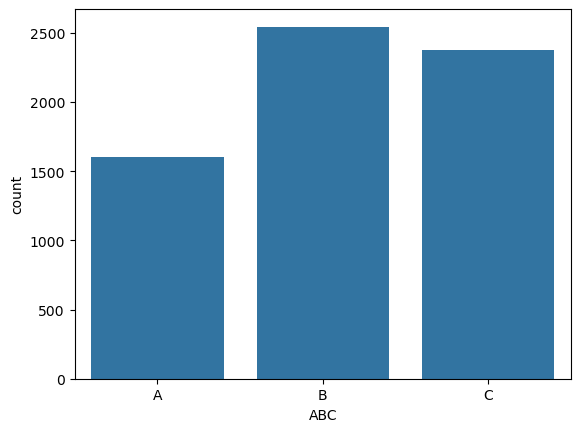

In [14]:
sns.countplot(x=df_tcc['ABC']);

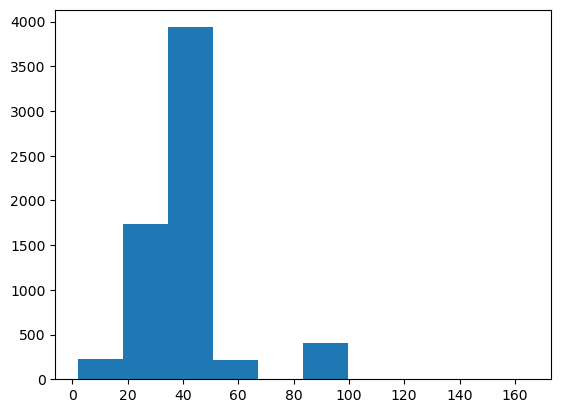

In [15]:
plt.hist(x=df_tcc['Lead Time']);

In [6]:
grafico = px.treemap(df_tcc, path=['Familia', 'Lead Time'])
grafico.show()

### Divisão entre previsores e classe

In [5]:
x_classe = df_tcc.iloc[:, 0:7].values
x_classe

array([[1, 'MAT ELETRICO', 'CONSUMO MEDIO', ..., 9.0, 258.7433,
        2328.6897],
       [10, 'MAT ELETRICO', 'CONSUMO MEDIO', ..., 40.333333333333336,
        30.73, 1239.4433],
       [1, 'MAT ELETRICO', 'CONSUMO MEDIO', ..., 56.333333333333336,
        30.73, 1731.1233],
       ...,
       [1, 'VEDACAO', 'CONSUMO MEDIO', ..., 4.0, 12.52, 50.08],
       [5, 'PARAFUSOS', 'CONSUMO MEDIO', ..., 309.6666666666667, 1.0733,
        332.3652],
       [5, 'VALVULAS', 'CONSUMO MEDIO', ..., 1.0, 1161.09, 1161.09]],
      dtype=object)

In [6]:
x_classe[0]

array([1, 'MAT ELETRICO', 'CONSUMO MEDIO', 40, 9.0, 258.7433, 2328.6897],
      dtype=object)

In [7]:
y_classe = df_tcc.iloc[:, 7].values
y_classe

array(['A', 'B', 'A', ..., 'B', 'B', 'C'], dtype=object)

### Tratamento de atributos categóricos

In [8]:
#Aplicando o Label Encoder
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder_teste = LabelEncoder()
teste = label_encoder_teste.fit_transform(x_classe[:, 0])
print(x_classe[:, 1])
print(teste)

['MAT ELETRICO' 'MAT ELETRICO' 'MAT ELETRICO' ... 'VEDACAO' 'PARAFUSOS'
 'VALVULAS']
[0 2 0 ... 0 1 1]


In [10]:
x_classe[0]

array([1, 'MAT ELETRICO', 'CONSUMO MEDIO', 40, 9.0, 258.7433, 2328.6897],
      dtype=object)

In [11]:
#Label Encoder para cada atributo
label_enconder_familia = LabelEncoder()
label_enconder_tipo_consumo = LabelEncoder()
label_enconder_loja = LabelEncoder()

In [12]:
x_classe[:,0] = label_enconder_loja.fit_transform(x_classe[:,0])
x_classe[:,1] = label_enconder_familia.fit_transform(x_classe[:,1])
x_classe[:,2] = label_enconder_tipo_consumo.fit_transform(x_classe[:,2])

In [13]:
x_classe[0]

array([0, 23, 0, 40, 9.0, 258.7433, 2328.6897], dtype=object)

In [14]:
x_classe

array([[0, 23, 0, ..., 9.0, 258.7433, 2328.6897],
       [2, 23, 0, ..., 40.333333333333336, 30.73, 1239.4433],
       [0, 23, 0, ..., 56.333333333333336, 30.73, 1731.1233],
       ...,
       [0, 34, 0, ..., 4.0, 12.52, 50.08],
       [1, 26, 0, ..., 309.6666666666667, 1.0733, 332.3652],
       [1, 33, 0, ..., 1.0, 1161.09, 1161.09]], dtype=object)

In [15]:
#Aplicando One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
onehotencoder_classe = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(sparse_output=False), [0, 1, 2])], remainder='passthrough')

In [17]:
x_classe = onehotencoder_classe.fit_transform(x_classe)
x_classe

array([[1.0, 0.0, 0.0, ..., 9.0, 258.7433, 2328.6897],
       [0.0, 0.0, 1.0, ..., 40.333333333333336, 30.73, 1239.4433],
       [1.0, 0.0, 0.0, ..., 56.333333333333336, 30.73, 1731.1233],
       ...,
       [1.0, 0.0, 0.0, ..., 4.0, 12.52, 50.08],
       [0.0, 1.0, 0.0, ..., 309.6666666666667, 1.0733, 332.3652],
       [0.0, 1.0, 0.0, ..., 1.0, 1161.09, 1161.09]], dtype=object)

In [18]:
x_classe[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 40, 9.0, 258.7433, 2328.6897], dtype=object)

In [19]:
x_classe.shape #(linhas, colunas)

(6530, 45)

### Escalonamento dos valores

In [20]:
#Será usado o método de padronização
from sklearn.preprocessing import StandardScaler
scaler_classe = StandardScaler()
x_classe = scaler_classe.fit_transform(x_classe)

In [21]:
x_classe[0]

array([ 1.05868713, -0.73986037, -0.43896932, -0.1155238 , -0.16691571,
       -0.14363651, -0.15848577, -0.15333288, -0.1327007 , -0.10484471,
       -0.05257497, -0.20848109, -0.0632261 , -0.04956055, -0.03032625,
       -0.19910643, -0.1010465 , -0.05945296, -0.11415488, -0.0554274 ,
       -0.26351451, -0.25030494, -0.10995124, -0.10995124, -0.04290752,
       -0.11620252, -0.03715046,  2.44774073, -0.21440963, -0.40007994,
       -0.30146097, -0.0175035 , -0.07548804, -0.14693361, -0.13150062,
       -0.23144258, -0.16349177, -0.13089674, -0.22248993,  0.07850687,
       -0.07850687, -0.05558679, -0.16594595, -0.12472151, -0.12652608])

### Divisão em treinamento e teste

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x_classe_treinamento, x_classe_teste, y_classe_treinamento, y_classe_teste = train_test_split(x_classe, y_classe, test_size=0.25, random_state=0)

In [26]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((4897, 45), (4897,))

In [27]:
x_classe_teste.shape, y_classe_teste.shape

((1633, 45), (1633,))

### Salvar as variáveis

In [28]:
import pickle

In [29]:
with open('abc.pkl', mode = 'wb') as f:
    pickle.dump([x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste], f)

## Aprendizagem Bayesiana -> 47%

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [32]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((4897, 45), (4897,))

In [33]:
x_classe_teste.shape, y_classe_teste.shape

((1633, 45), (1633,))

### Treinamento

In [34]:
naive_classe = GaussianNB()
naive_classe.fit(x_classe_treinamento, y_classe_treinamento)
previsoes = naive_classe.predict(x_classe_teste)
previsoes

array(['A', 'A', 'B', ..., 'A', 'A', 'B'], dtype='<U1')

In [35]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

### Calculando Acuracidade

In [36]:
#calcular acuracidade
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [37]:
accuracy_score(y_classe_teste, previsoes) #não escalonar pode gerar um resultado melhor

0.46907532149418246

0.46907532149418246

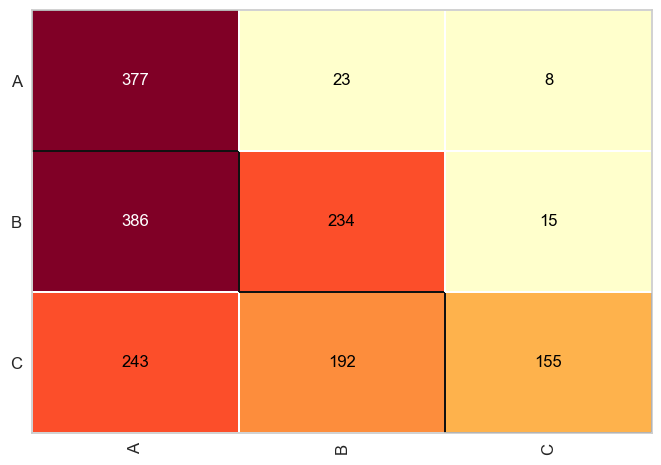

In [38]:
cm = ConfusionMatrix(naive_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

Está classificando muitos materiais como "A"

In [39]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.37      0.92      0.53       408
           B       0.52      0.37      0.43       635
           C       0.87      0.26      0.40       590

    accuracy                           0.47      1633
   macro avg       0.59      0.52      0.46      1633
weighted avg       0.61      0.47      0.45      1633



Acuracidade de apenas 38%

## Árvore de Decisão -> 54%

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [42]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((4897, 45), (4897,))

### Treinamento

In [43]:
arvore_classe = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_classe.fit(x_classe_treinamento, y_classe_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
previsoes = arvore_classe.predict(x_classe_teste)
previsoes

array(['B', 'B', 'B', ..., 'B', 'C', 'A'], dtype=object)

In [45]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

### Calculando acuracidade

In [46]:
accuracy_score(y_classe_teste, previsoes)

0.5443968156766688

0.5443968156766688

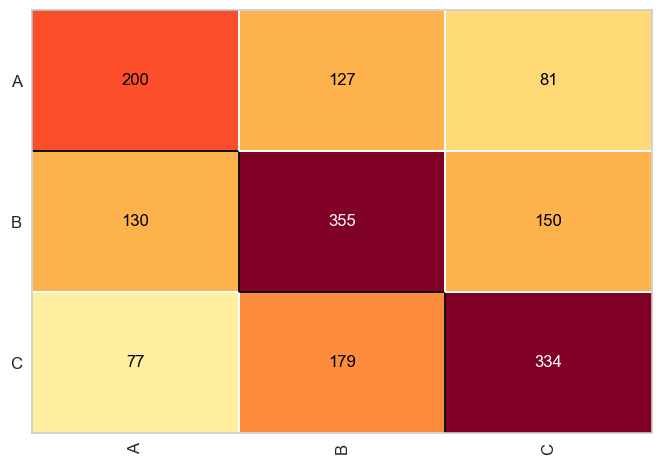

In [47]:
cm = ConfusionMatrix(arvore_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [48]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.49      0.49      0.49       408
           B       0.54      0.56      0.55       635
           C       0.59      0.57      0.58       590

    accuracy                           0.54      1633
   macro avg       0.54      0.54      0.54      1633
weighted avg       0.55      0.54      0.54      1633



## Floresta Randômica -> 62%

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

### Treinamento

In [51]:
random_forest_classe = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_classe.fit(x_classe_treinamento, y_classe_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [52]:
previsoes = random_forest_classe.predict(x_classe_teste)
previsoes

array(['B', 'B', 'B', ..., 'A', 'B', 'C'], dtype=object)

In [53]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

### Calculando Acuracidade

In [54]:
accuracy_score(y_classe_teste, previsoes)

0.6240048989589713

0.6240048989589713

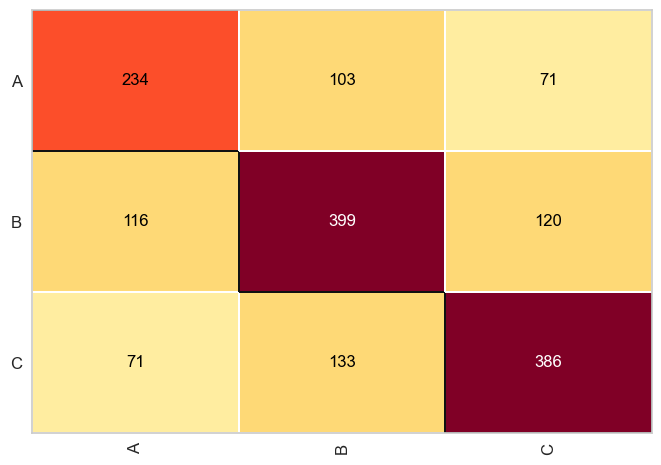

In [55]:
cm = ConfusionMatrix(random_forest_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [56]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.56      0.57      0.56       408
           B       0.63      0.63      0.63       635
           C       0.67      0.65      0.66       590

    accuracy                           0.62      1633
   macro avg       0.62      0.62      0.62      1633
weighted avg       0.62      0.62      0.62      1633



## Aprendizagem baseada em instâncias -> 64%

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [58]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

### Treinamento

In [59]:
knn_classe = KNeighborsClassifier(n_neighbors=25)
knn_classe.fit(x_classe_treinamento, y_classe_treinamento)

KNeighborsClassifier(n_neighbors=25)

In [60]:
previsoes = knn_classe.predict(x_classe_teste)
previsoes

array(['B', 'B', 'B', ..., 'B', 'C', 'C'], dtype=object)

In [61]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

### Acuracidade

In [62]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_classe_teste, previsoes)

0.6387017758726271

0.6387017758726271

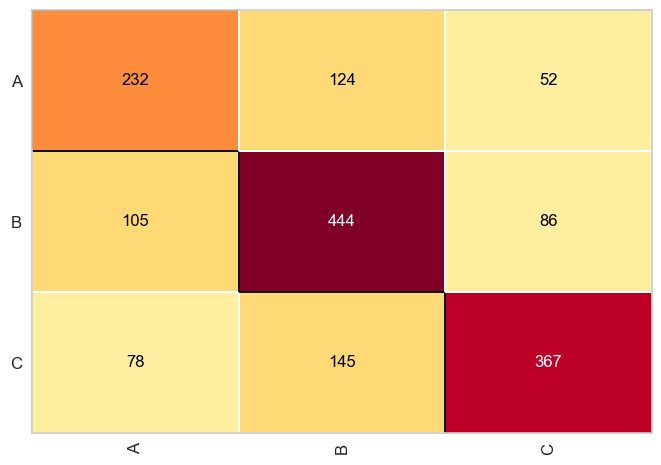

In [63]:
from yellowbrick.classifier import  ConfusionMatrix
cm =  ConfusionMatrix(knn_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [64]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.56      0.57      0.56       408
           B       0.62      0.70      0.66       635
           C       0.73      0.62      0.67       590

    accuracy                           0.64      1633
   macro avg       0.64      0.63      0.63      1633
weighted avg       0.64      0.64      0.64      1633



## Regressão Logística -> 61%

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [67]:
logistic_classe = LogisticRegression(random_state=1)
logistic_classe.fit(x_classe_treinamento, y_classe_treinamento)

LogisticRegression(random_state=1)

In [68]:
previsoes = logistic_classe.predict(x_classe_teste)
previsoes

array(['A', 'C', 'B', ..., 'A', 'C', 'C'], dtype=object)

In [69]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

In [70]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_classe_teste, previsoes)

0.6117575015309247

0.6117575015309247

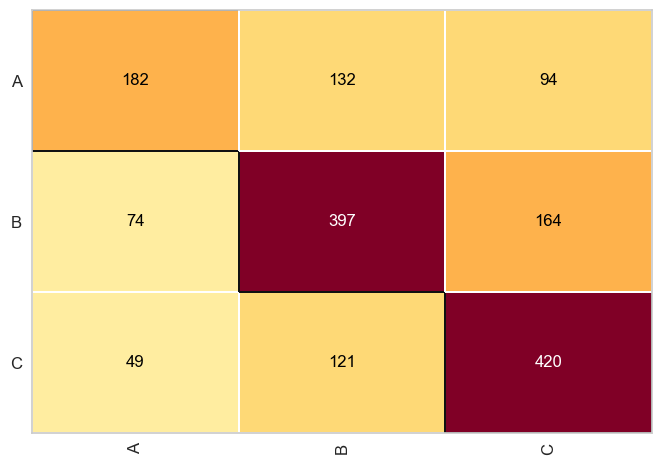

In [71]:
from yellowbrick.classifier import  ConfusionMatrix
cm =  ConfusionMatrix(logistic_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [72]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.60      0.45      0.51       408
           B       0.61      0.63      0.62       635
           C       0.62      0.71      0.66       590

    accuracy                           0.61      1633
   macro avg       0.61      0.59      0.60      1633
weighted avg       0.61      0.61      0.61      1633



## Máquina de vetores de suporte (SVM) -> 62%

In [73]:
from sklearn.svm import SVC

In [74]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [75]:
svm_classe = SVC(kernel='poly', random_state=1)
svm_classe.fit(x_classe_treinamento, y_classe_treinamento)

SVC(kernel='poly', random_state=1)

In [76]:
previsoes = svm_classe.predict(x_classe_teste)
previsoes

array(['B', 'B', 'B', ..., 'B', 'B', 'C'], dtype=object)

In [77]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

In [78]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_classe_teste, previsoes)

0.617881200244948

0.617881200244948

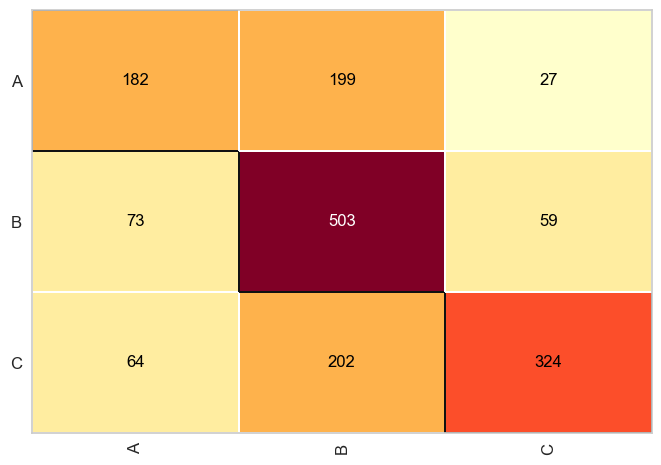

In [79]:
from yellowbrick.classifier import  ConfusionMatrix
cm =  ConfusionMatrix(svm_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [80]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.57      0.45      0.50       408
           B       0.56      0.79      0.65       635
           C       0.79      0.55      0.65       590

    accuracy                           0.62      1633
   macro avg       0.64      0.60      0.60      1633
weighted avg       0.64      0.62      0.61      1633



## Redes neurais artificiais -> 63%

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [83]:
x_classe_treinamento.shape, y_classe_treinamento.shape

((4897, 45), (4897,))

In [84]:
(45 + 1) / 2

23.0

In [85]:
#39 -> 20 -> 20 -> 1
rede_neural_classe = MLPClassifier(verbose=True, max_iter=1500, tol=0.000010, 
                                   hidden_layer_sizes=(23,23))
rede_neural_classe.fit(x_classe_treinamento, y_classe_treinamento)

Iteration 1, loss = 1.27756863
Iteration 2, loss = 1.06077416
Iteration 3, loss = 0.99225702
Iteration 4, loss = 0.95104568
Iteration 5, loss = 0.92133086
Iteration 6, loss = 0.89874007
Iteration 7, loss = 0.87937317
Iteration 8, loss = 0.86150303
Iteration 9, loss = 0.84597548
Iteration 10, loss = 0.83221693
Iteration 11, loss = 0.82077543
Iteration 12, loss = 0.81179225
Iteration 13, loss = 0.80364058
Iteration 14, loss = 0.79830855
Iteration 15, loss = 0.79347106
Iteration 16, loss = 0.78908837
Iteration 17, loss = 0.78626861
Iteration 18, loss = 0.78316358
Iteration 19, loss = 0.78088192
Iteration 20, loss = 0.77926863
Iteration 21, loss = 0.77643313
Iteration 22, loss = 0.77574766
Iteration 23, loss = 0.77330084
Iteration 24, loss = 0.77203670
Iteration 25, loss = 0.77109500
Iteration 26, loss = 0.76994716
Iteration 27, loss = 0.76808582
Iteration 28, loss = 0.76633756
Iteration 29, loss = 0.76584727
Iteration 30, loss = 0.76488860
Iteration 31, loss = 0.76328349
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(23, 23), max_iter=1500, tol=1e-05,
              verbose=True)

In [86]:
previsoes = rede_neural_classe.predict(x_classe_teste)
previsoes

array(['B', 'B', 'B', ..., 'B', 'B', 'C'], dtype='<U1')

In [87]:
y_classe_teste

array(['B', 'C', 'C', ..., 'A', 'B', 'C'], dtype=object)

In [88]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_classe_teste, previsoes)

0.6301285976729945

0.6301285976729945

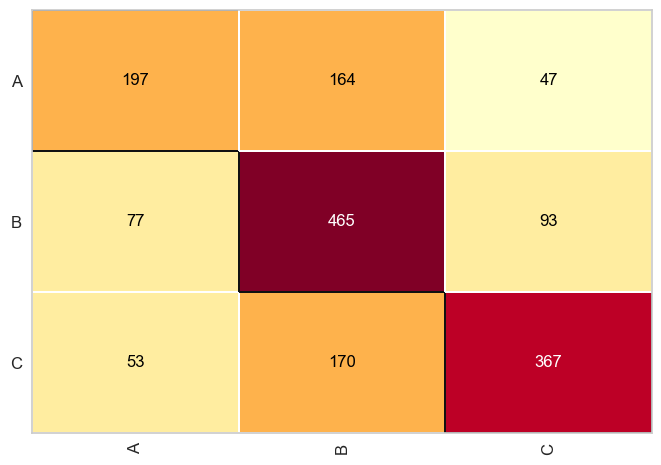

In [89]:
from yellowbrick.classifier import  ConfusionMatrix
cm =  ConfusionMatrix(rede_neural_classe)
cm.fit(x_classe_treinamento, y_classe_treinamento)
cm.score(x_classe_teste, y_classe_teste)

In [90]:
print(classification_report(y_classe_teste, previsoes))

              precision    recall  f1-score   support

           A       0.60      0.48      0.54       408
           B       0.58      0.73      0.65       635
           C       0.72      0.62      0.67       590

    accuracy                           0.63      1633
   macro avg       0.64      0.61      0.62      1633
weighted avg       0.64      0.63      0.63      1633



## Ajuste dos parâmetros

### GridSearch

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
import pickle
with open('abc.pkl', 'rb') as f:
    x_classe_treinamento, y_classe_treinamento, x_classe_teste, y_classe_teste = pickle.load(f)

In [4]:
x_classe_treinamento. shape, y_classe_treinamento.shape

((4897, 45), (4897,))

In [5]:
x_classe_teste.shape, y_classe_teste.shape

((1633, 45), (1633,))

In [6]:
x_classe = np.concatenate((x_classe_treinamento, x_classe_teste), axis=0)
x_classe.shape

(6530, 45)

In [7]:
y_classe = np.concatenate((y_classe_treinamento, y_classe_teste), axis=0)
y_classe.shape

(6530,)

In [8]:
y_classe

array(['A', 'B', 'B', ..., 'A', 'B', 'C'], dtype=object)

### Árvore de Decisão

In [98]:
parametros = {
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]
              }
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
0.629249617151608


O resultado foi melhor que o anterior feito manualmente

### Random Forest

In [100]:
parametros = {
              'criterion': ['gini', 'entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]
              }
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.6470137825421134


Resultado melhor que o manual

### KNN

In [106]:
parametros = {
              'n_neighbors': [3,5,10,20,25,30],
              'p': [1,2]
              }
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 259, in predict
    probabil

{'n_neighbors': 30, 'p': 2}
0.6376722817764164


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [       nan 0.61286371        nan 0.61929556        nan 0.61990812
        nan 0.6280245         nan 0.6338438         nan 0.63767228]
  warnings.warn(


Anteriormente ficou ligeiramente melhor

### Regressão Logística

In [107]:
parametros = {
              'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0,1.5,2.0],
              'solver': ['lbfgs', 'sag', 'saga']
              }
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.599540581929556


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Os valores padrões do algoritmo se sairam melhores, como visto anteriormente

### SVM

In [ ]:
parametros = {
              'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0,1.5,2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
              }
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Rede Neural

In [14]:
parametros = {
              'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10,56]
              }
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_classe, y_classe)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

In [15]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'sgd'}
0.6372128637059724


### Validação Cruzada

In [4]:
from sklearn.model_selection import cross_val_score, KFold

In [5]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=2, splitter='random')
  scores = cross_val_score(arvore, x_classe, y_classe, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split=10, n_estimators = 100)
  scores = cross_val_score(random_forest, x_classe, y_classe, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors=25)
  scores = cross_val_score(knn, x_classe, y_classe, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.5, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, x_classe, y_classe, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'poly')
  scores = cross_val_score(svm, x_classe, y_classe, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'sgd')
  scores = cross_val_score(rede_neural, x_classe, y_classe, cv = kfold)
  resultados_rede_neural.append(scores.mean())

0


NameError: name 'DecisionTreeClassifier' is not defined

In [3]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

NameError: name 'resultados_arvore' is not defined

In [12]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.624451,0.644288,0.636651,0.601884,0.610276,0.638229
std,0.004063,0.002345,0.002092,0.002135,0.001360,0.002646
min,0.614395,0.638285,0.632925,0.598162,0.607810,0.632925
25%,0.621286,0.642726,0.635873,0.600919,0.609456,0.636409
50%,0.624655,0.643721,0.636677,0.601378,0.610260,0.638668
75%,0.626799,0.645827,0.637634,0.603560,0.611141,0.639510
max,0.631547,0.649158,0.640582,0.607044,0.613017,0.643032


In [13]:
resultados.var()

Arvore           0.000017
Random forest    0.000005
KNN              0.000004
Logistica        0.000005
SVM              0.000002
Rede neural      0.000007
dtype: float64

In [14]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.650574
Random forest    0.363989
KNN              0.328558
Logistica        0.354646
SVM              0.222924
Rede neural      0.414567
dtype: float64